### Carzam
Trying to do transfer learning on the Vgg16 model for predicting car make/model.

In [15]:
import os

import keras
from keras.preprocessing import image

from matplotlib import pyplot as plt
import numpy as np
from numpy.random import permutation
np.set_printoptions(precision=4, linewidth=100)

In [16]:
# Contains some utilty functions
# TODO Figure out what "reload" does
import utils; reload(utils)
from utils import plots
# Contains the trained Vgg16 model (2014 winner of ImageNet)
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [17]:
path = "../data/carzam/"
# path = "../data/carzam/sample/"
# Path containing trained models
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [5]:
# For showing the plots in this webpage
%matplotlib inline

In [6]:
# If running out of memory or using an older GPU, decrease this number
batch_size = 4

In [19]:
vgg = Vgg16()
# Grab a few images at a time for training and validation
# batches = vgg.get_batches(path+'train', batch_size=batch_size)
# val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

In [20]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 173 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [21]:
imgs, labels = next(batches)

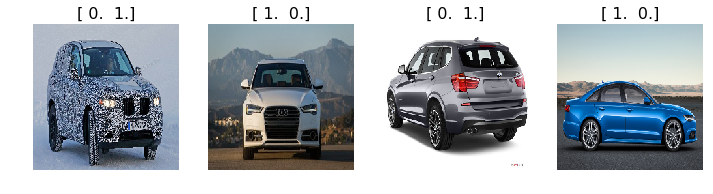

In [22]:
plots(imgs, titles=labels)

In [23]:
vgg.finetune(batches)

In [24]:
# Plot the results of the training
def plot_results(history):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/1
173/173 [==============================] - 5s - loss: 1.0216 - acc: 0.6590 - val_loss: 1.0607 - val_acc: 0.7727


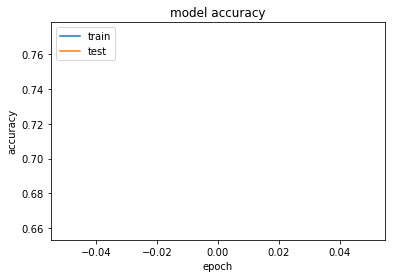

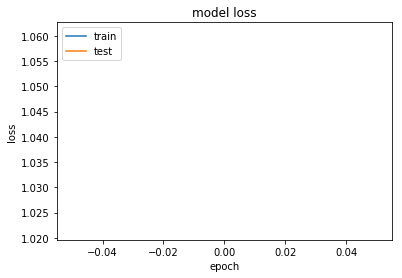

In [25]:
history = vgg.fit(batches, val_batches, nb_epoch=1)
plot_results(history)

In [21]:
vgg.model.save_weights(model_path+'finetune_5_epochs.h5')

In [22]:
vgg.predict(imgs, True)

(array([ 0.3931,  0.9782,  0.9576,  0.9966], dtype=float32),
 array([3, 0, 1, 1]),
 ['honda_civic_2006', 'audi_a6', 'bmw_x3', 'bmw_x3'])

In [23]:
test_batches, probs = vgg.test(path+'test', batch_size=batch_size)
labels = test_batches.classes
filenames = test_batches.filenames

Found 54 images belonging to 5 classes.


In [27]:
labels_predicted = [np.argmax(prob) for prob in probs]

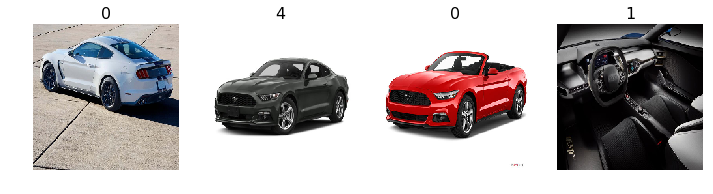

In [54]:
test_imgs = next(test_batches)
plots(test_imgs, titles=labels_predicted)

In [21]:
def plots_idx(idx, titles=None):
    """Helper function for plotting images by index in the validation set."""
    if len(idx) > 0:
        plots([image.load_img(path+'valid/'+filenames[i]) for i in idx], titles=titles)
    else:
        print "Nothing to plot!"